In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df = pd.read_csv(".\diabetes.csv")
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [5]:
from xgboost import XGBClassifier

In [6]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [7]:
xgb_model.get_params()

{'objective': 'binary:logistic',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [8]:
xgb_params = {"n_estimators": [100,200,500], "subsample": [0.6, 0.8, 1], "max_depth": [3, 5, 6, 8, 10],
             "learning_rate": [0.3, 0.5, 0.2, 0.4]}

In [9]:
xgb_cv_model = GridSearchCV(xgb_model, xgb_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 538 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 1104 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:   31.7s finished


In [10]:
xgb_cv_model.best_params_

{'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 100, 'subsample': 0.8}

In [65]:
xgb_tuned = XGBClassifier(learning_rate = 0.5, max_depth = 3, n_estimators = 100, subsample = 1).fit(X_train, y_train)

In [66]:
y_pred = xgb_tuned.predict(X_test)

In [68]:
accuracy_score(y_test, y_pred)

0.7445887445887446

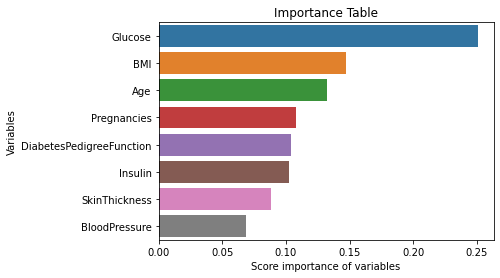

In [69]:
feature_imp = pd.Series(xgb_tuned.feature_importances_, index = X_train.columns).sort_values(ascending = False)
import seaborn as sns

sns.barplot(x = feature_imp, y = feature_imp.index)
plt.xlabel("Score importance of variables")
plt.ylabel("Variables")
plt.title("Importance Table")
plt.show()